# DSA Telkomsel - Homework for Python Programming 
<br>Date: 2019-11-06
<br>Author: Dewa Satria

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DSA/Phyton Programming III/titanic/train.csv', encoding='latin1')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
survive = df[df['Survived']==1]['Sex'].value_counts()
death = df[df['Survived']==0]['Sex'].value_counts()
sd = pd.DataFrame([survive,death])
sd.index = ('survived', 'death')
sd = sd.T
sd

,survived,death
female,233,81
male,109,468


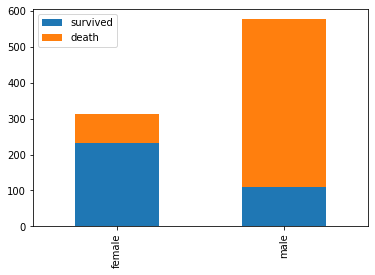

In [6]:
sd.plot(kind='bar', stacked=True);

In [7]:
sur = df[df['Survived']==1]

In [18]:
#transforming Pclass and Embarked

sur['economic_status']=sur.Pclass.map({1: 'High', 2: 'Mid', 3: 'Low'})
sur['embarked_port']=sur.Embarked.map({'C':'Cherbourg','Q':'Queenstown','S':'Southampton'})

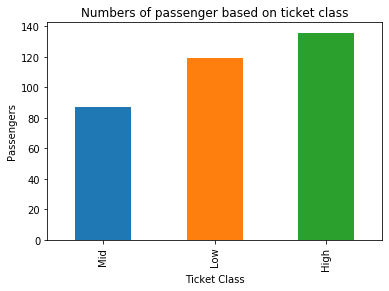

Mid      87
Low     119
High    136
Name: economic_status, dtype: int64


In [34]:
sur['economic_status'].value_counts().sort_values().plot.bar()
plt.title('Numbers of passenger based on ticket class')
plt.ylabel('Passengers')
plt.xlabel('Ticket Class')
plt.show()
print(sur['economic_status'].value_counts().sort_values())

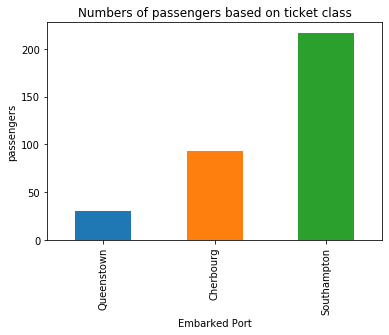

Queenstown      30
Cherbourg       93
Southampton    217
Name: embarked_port, dtype: int64


In [35]:
sur['embarked_port'].value_counts().sort_values().plot.bar()
plt.title('Numbers of passengers based on ticket class')
plt.ylabel('passengers')
plt.xlabel('Embarked Port')
plt.show()
print(sur['embarked_port'].value_counts().sort_values())

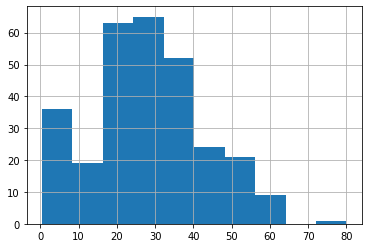

In [25]:
#checking for age range using histogram
sur.Age.hist()

In [26]:
#Grouping Ages

age_split = [0,10,18,25,40,90]
age_status = ['Kiddos','Teenager','Young Adult','Adult','Elder']
sur['age_status'] = pd.cut(sur.Age,age_split,labels=age_status)

In [29]:
#Family checking

sur['family_members'] = sur.SibSp+sur.Parch
isfamily = (sur.family_members>0)*1
sur['isfamily'] = isfamily

In [30]:
sur.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,economic_status,embarked_port,age_status,family_members,isfamily
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,High,Cherbourg,Adult,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Low,Southampton,Adult,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,High,Southampton,Adult,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Low,Southampton,Adult,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mid,Cherbourg,Teenager,1,1


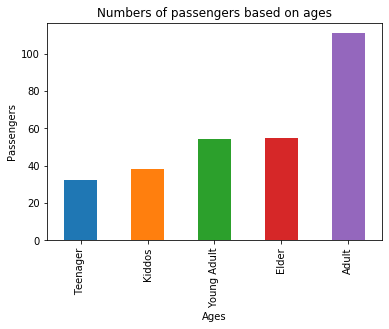

Teenager        32
Kiddos          38
Young Adult     54
Elder           55
Adult          111
Name: age_status, dtype: int64


In [33]:
sur['age_status'].value_counts().sort_values().plot.bar()
plt.title('Numbers of passengers based on ages')
plt.ylabel('Passengers')
plt.xlabel('Ages')
plt.show()
print(sur['age_status'].value_counts().sort_values())

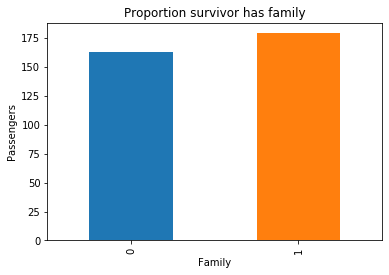

0    163
1    179
Name: isfamily, dtype: int64


In [36]:
sur['isfamily'].value_counts().sort_values().plot.bar()
plt.title('Proportion survivor has family')
plt.ylabel('Passengers')
plt.xlabel('Family')
plt.show()
print(sur['isfamily'].value_counts().sort_values())

# Based on the data, we can describe:
<br>1. Female passangers mostly survived from Titanic insident rather than Male
<br>2. High Class Passengers (1st) has highest number of survived with 136 passengers
<br>3. Mostly embarked from Southampton
<br>4. On ages, Adult Passangers has gain more number of survived
<br>5. Survivor mostly has family on the cruise